In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns

import os
import re

In [19]:

!pip install statsmodels --upgrade 
import statsmodels.formula.api as smf 

  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\gt\\anaconda3\\lib\\site-packages\\~tatsmodels\\tsa\\statespace\\_filters\\_conventional.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ImportError: cannot import name 'Appender' from 'statsmodels.compat.pandas' (C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py)

In [8]:
df=pd.read_csv('Company Stock and Investment.csv')

In [9]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [10]:
df['x']=df['Gold Investments'].shift(1)

In [11]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments,x
0,31-12-2009,0.025417,0.000150,0.017354,0.006848,NaN
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609,0.000150
2,05-01-2010,0.002699,0.001560,0.001729,0.005900,0.001097
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116,0.001560
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013,0.006009


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 6 columns):
Date                       1984 non-null object
Oil Investments            1984 non-null float64
Gold Investments           1984 non-null float64
Comp Stock                 1984 non-null float64
Other sharesInvestments    1984 non-null float64
x                          1983 non-null float64
dtypes: float64(5), object(1)
memory usage: 93.1+ KB


In [15]:
df.describe()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments,x
count,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000
mean,-0.000435,-0.020152,0.001007,0.001269,-0.020165
std,0.030869,0.140965,0.016017,0.019733,0.141000
min,-1.000000,-1.000000,-0.123558,-0.126568,-1.000000
25%,-0.011021,-0.005881,-0.006926,-0.008492,-0.005883
50%,0.000277,0.000000,0.000876,0.000840,0.000000
75%,0.010734,0.005454,0.009708,0.011632,0.005440
max,0.119511,0.049577,0.088741,0.157457,0.049577


In [16]:
df_naive = df[['Gold Investments','x']][1:]

In [17]:
df_naive.head()

,Gold Investments,x
1,0.001097,0.000150
2,0.001560,0.001097
3,0.006009,0.001560
4,0.000221,0.006009
5,-0.013097,0.000221


In [ ]:
df[]

In [18]:
from sklearn import metrics
from math import sqrt
true = df_naive['Gold Investments']

In [19]:
prediction = df_naive['x']
error = sqrt(metrics.mean_squared_error(true,prediction))
print ('RMSE for Naive Method 1: ', error)


RMSE for Naive Method 1:  0.20164460952809773


In [20]:
split = len(df) - int(0.2*len(df))
train, test = df['Gold Investments'][0:split], df['Gold Investments'][split:]

In [21]:
import matplotlib.pyplot as plt

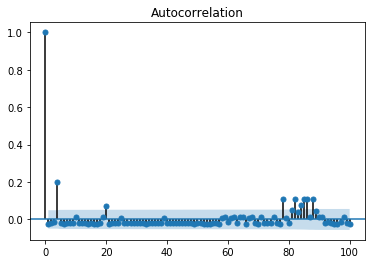

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train , lags =100)
plt.show()

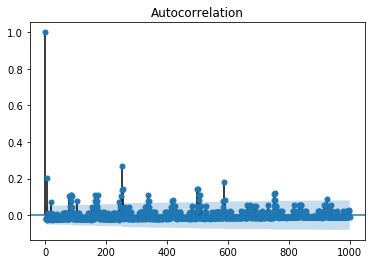

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train , lags =1000)
plt.show()

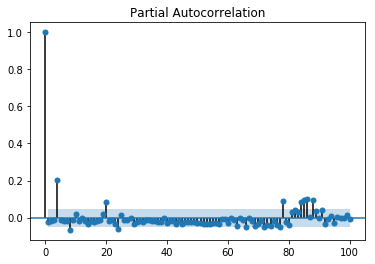

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train , lags =100)
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key , value))

ADF Statistic: -14.152899
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
